<a href="https://colab.research.google.com/github/praaatik/pytorch/blob/main/computer_vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.xkcd()

## Steps to do

- Download the dataset using torchvision.
- Load the data using `DataLoader`.

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26421880/26421880 [00:02<00:00, 10976520.33it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 198031.89it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3701947.91it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13683318.75it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
classes = train_data.classes
print(len(classes))

10


In [4]:
train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)

In [5]:
type(train_dataloader), train_dataloader.batch_size, train_dataloader.dataset

(torch.utils.data.dataloader.DataLoader,
 32,
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [6]:
temp_variable = next(iter(train_dataloader))


In [7]:
temp_variable[0].shape, temp_variable[1].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

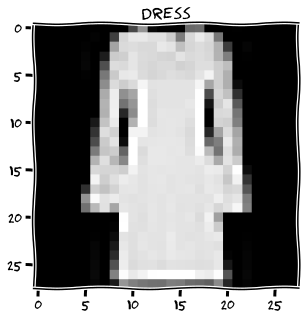

In [8]:
random_feature, random_label = temp_variable[0][10], temp_variable[1][10]

plt.imshow(random_feature.squeeze(), cmap="gray")
plt.title(classes[int(random_label)])
plt.show();

In [15]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
            # nn.Linear(in_features=hidden_units*7*7,
            #           out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        print(f"Output from self_block_1 => {x.shape}")
        x = self.block_2(x)
        # print(x.shape)
        print(f"Output from self_block_2 => {x.shape}")
        x = self.classifier(x)
        # print(x.shape)
        print(f"Output from classifier => {x.shape}")
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(classes))
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
random_tensor = torch.rand(size=(1, 28, 28))
model_2(random_tensor)

Output from self_block_1 => torch.Size([10, 14, 14])
Output from self_block_2 => torch.Size([10, 7, 7])


RuntimeError: ignored

In [ ]:
model_2 = ModelV2(input_shape=28*28,
                  output_shape=len(classes),
                  hidden_units=10)

print(model_2.state_dict())

OrderedDict([('layer_stack.1.weight', tensor([[-0.0169, -0.0109,  0.0192,  ..., -0.0158, -0.0033,  0.0340],
        [-0.0345,  0.0306,  0.0185,  ...,  0.0069,  0.0081, -0.0017],
        [-0.0205,  0.0068,  0.0160,  ...,  0.0053, -0.0053, -0.0339],
        ...,
        [-0.0181, -0.0200, -0.0071,  ..., -0.0080,  0.0266, -0.0279],
        [-0.0003, -0.0254, -0.0196,  ...,  0.0037, -0.0173,  0.0303],
        [ 0.0004,  0.0300, -0.0195,  ..., -0.0157, -0.0326,  0.0093]])), ('layer_stack.1.bias', tensor([ 0.0088, -0.0267,  0.0056, -0.0349,  0.0276, -0.0285,  0.0296, -0.0137,
        -0.0327, -0.0028])), ('layer_stack.3.weight', tensor([[-0.0933,  0.3001,  0.1967,  0.0999,  0.2554,  0.3036, -0.2001, -0.1585,
          0.2427,  0.1232],
        [-0.3035,  0.1049, -0.2303,  0.3031, -0.0802,  0.0010, -0.0231,  0.2796,
         -0.2373,  0.0527],
        [ 0.2186, -0.1899,  0.0402, -0.1269,  0.2469, -0.1406, -0.3065,  0.0165,
          0.2135, -0.3076],
        [-0.0125,  0.1809, -0.1951, -0.246

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                         lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  train_loss = 0.0
  # model.train()
  for batch, (X, y) in enumerate(data_loader):
    y_prediction = model(X)
    loss = loss_function(y_prediction, y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  print(f"Train loss: {train_loss:.5f}")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_function: torch.nn.Module):
  test_loss = 0.0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      test_prediction = model(X)
      # try keeping the loss variable and check if the training is the same
      # loss =
      test_loss += loss_function(test_prediction, y)
    test_loss /= len(data_loader)

  print(f"Test loss: {test_loss:.5f}")

In [ ]:
torch.manual_seed(42)

epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_function=loss_function,
        optimizer=optimizer,
        # accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_function=loss_function,
        # accuracy_fn=accuracy_fn
    )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

Epoch: 0
---------
Train loss: 1.29805
Test loss: 1.32795
Epoch: 1
---------
Train loss: 1.28900
Test loss: 1.31554
Epoch: 2
---------
Train loss: 1.27894
Test loss: 1.31063
Epoch: 3
---------
Train loss: 1.27231
Test loss: 1.31163
Epoch: 4
---------
Train loss: 1.26773
Test loss: 1.31726


In [33]:
# http://layer-calc.com/
# https://github.com/teddylee777/pytorch-layer-calculator/blob/944ba048c6cdf1cd737fbde0675a81734359cf85/app.py#L161

import math
def calculate_conv2d_output_size(image_size, kernel_size=3, stride=1, padding=0):
    return math.floor((image_size - kernel_size + 2 * padding) / stride) + 1

# def calculate_conv2dtanspose_output_size(image_size, kernel_size=3, stride=1, padding=0):
#     return math.floor((image_size - 1) * stride - 2 * padding + (kernel_size -1) + 1)

def calculate_maxpool2d_output_size(image_size, kernel_size=2, stride=2, padding=0):
    return math.floor((image_size + 2 * padding - (kernel_size -1) -1 ) / stride ) + 1

def calculate_flatten_output_size(image_width, image_height):
  return image_width * image_height

In [34]:
w, h = 28, 28
out_channel, out_w, out_h = 10, calculate_conv2d_output_size(image_size=w, kernel_size=3, stride=1, padding=1), calculate_conv2d_output_size(image_size=h, kernel_size=3, stride=1, padding=1)
print(out_channel, out_w, out_h)

out_channel, out_w, out_h = 10, calculate_conv2d_output_size(image_size=out_w, kernel_size=3, stride=1, padding=1), calculate_conv2d_output_size(image_size=out_h, kernel_size=3, stride=1, padding=1)
print(out_channel, out_w, out_h)

out_channel, out_w, out_h = 10, calculate_maxpool2d_output_size(out_w, kernel_size=2, stride=2, padding=0), calculate_maxpool2d_output_size(out_w, kernel_size=2, stride=2, padding=0)
print(out_channel, out_w, out_h)

out_channel, out_w, out_h = 10, calculate_conv2d_output_size(image_size=out_w, kernel_size=3, stride=1, padding=1), calculate_conv2d_output_size(image_size=out_h, kernel_size=3, stride=1, padding=1)
print(out_channel, out_w, out_h)

out_channel, out_w, out_h = 10, calculate_conv2d_output_size(image_size=out_w, kernel_size=3, stride=1, padding=1), calculate_conv2d_output_size(image_size=out_h, kernel_size=3, stride=1, padding=1)
print(out_channel, out_w, out_h)

out_channel, out_w, out_h = 10, calculate_maxpool2d_output_size(out_w, kernel_size=2, stride=2, padding=0), calculate_maxpool2d_output_size(out_w, kernel_size=2, stride=2, padding=0)
print(out_channel, out_w, out_h)

out_channel, output = 10, calculate_flatten_output_size(out_w, out_h)
print(out_channel, output)


10 28 28
10 28 28
10 14 14
10 14 14
10 14 14
10 7 7
10 49


In [30]:
input = torch.randn(32, 1, 5, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
output.size()
# # With non-default parameters
# m = nn.Flatten(0, 2)
# output = m(input)
# output.size()

torch.Size([32, 25])